In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


Epoch 1/20


c:\Users\dgala\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


366/366 [==============================] - 2s 3ms/step - loss: 1.6808 - accuracy: 0.6144 - val_loss: 0.9596 - val_accuracy: 0.7840
Epoch 2/20
366/366 [==============================] - 1s 4ms/step - loss: 0.7891 - accuracy: 0.8184 - val_loss: 0.6969 - val_accuracy: 0.8334
Epoch 3/20
366/366 [==============================] - 1s 4ms/step - loss: 0.6403 - accuracy: 0.8445 - val_loss: 0.6162 - val_accuracy: 0.8508
Epoch 4/20
366/366 [==============================] - 1s 2ms/step - loss: 0.5701 - accuracy: 0.8599 - val_loss: 0.6063 - val_accuracy: 0.8483
Epoch 5/20
366/366 [==============================] - 1s 3ms/step - loss: 0.5306 - accuracy: 0.8655 - val_loss: 0.5256 - val_accuracy: 0.8659
Epoch 6/20
366/366 [==============================] - 1s 3ms/step - loss: 0.4978 - accuracy: 0.8722 - val_loss: 0.5353 - val_accuracy: 0.8647
Epoch 7/20
366/366 [==============================] - 1s 3ms/step - loss: 0.4704 - accuracy: 0.8787 - val_loss: 0.5002 - val_accuracy: 0.8759
Epoch 8/20
366/36

c:\Users\dgala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


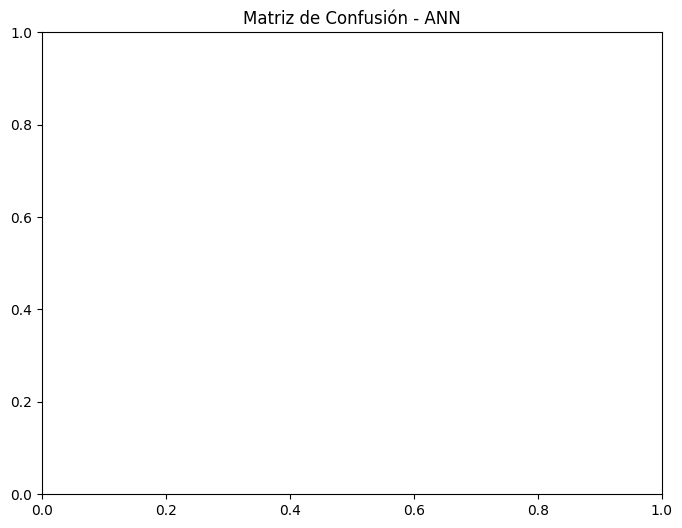

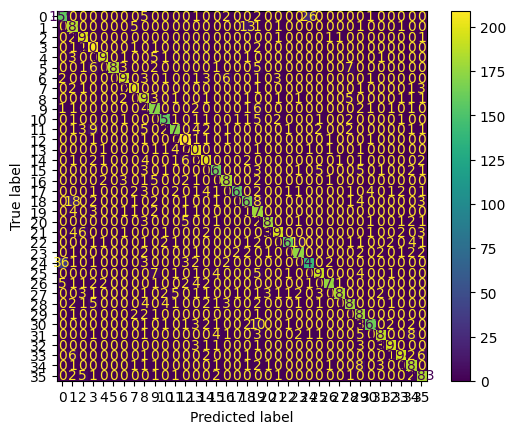

Tiempo de entrenamiento del modelo ANN: 22.02 segundos


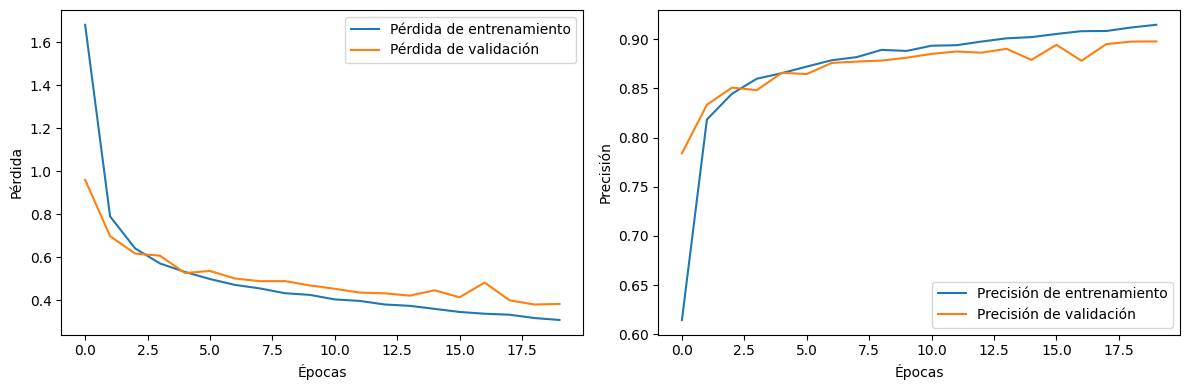

In [4]:
# Cargar datos desde el archivo CSV
dataset = np.loadtxt("dataset.csv", delimiter=',')

# Separar etiquetas y píxeles
labels = dataset[:, 0].astype(int)
pixels = dataset[:, 1:] / 255.0  # Normalizar píxeles

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)

# Convertir las etiquetas a formato categórico
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_train_onehot = onehot_encoder.fit_transform(integer_encoded)

# Construir el modelo ANN
model_ann = Sequential()
model_ann.add(Dense(128, input_dim=784, activation='relu'))
model_ann.add(Dense(36, activation='softmax'))  # 36 clases: 10 números + 26 letras

# Compilar el modelo
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Medir el tiempo de entrenamiento
start_time = time.time()
# Entrenar el modelo y guardar historial del entrenamiento
history_ann = model_ann.fit(X_train, y_train_onehot, epochs=20, batch_size=64, validation_split=0.2)
end_time = time.time()
training_time = end_time - start_time

# Realizar predicciones en el conjunto de prueba
predictions_ann = np.argmax(model_ann.predict(X_test), axis=1)

# Calcular la precisión del modelo
accuracy_ann = accuracy_score(y_test, predictions_ann)
print(f'Precisión del modelo con ANN: {accuracy_ann * 100:.2f}%')

# Imprimir el nombre del archivo donde se guardó el modelo
model_filename_ann = "ann_model.h5"
model_ann.save(model_filename_ann)
print(f'Modelo ANN guardado en: {model_filename_ann}')

# Plotear la matriz de confusión
conf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
plt.title('Matriz de Confusión - ANN')

disp_ann = ConfusionMatrixDisplay(conf_matrix_ann)
disp_ann.plot()
plt.show()

# Imprimir el tiempo de entrenamiento
print(f'Tiempo de entrenamiento del modelo ANN: {training_time:.2f} segundos')

# Visualizar el rendimiento del modelo durante el entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history_ann.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_ann.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_ann.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:

# Mapeo de números a letras
number_to_letter = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6',
                    7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D',
                    14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K',
                    21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R',
                    28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}

def number_to_letter_mapping(number):
    return number_to_letter.get(number, str(number))

# Preprocesamiento de una única imagen de letra para ANN
def preprocess_image_ann(input_path, output_path, vertical_padding):
    input_image = Image.open(input_path).convert('L')

    # Aumentar contraste
    enhancer = ImageEnhance.Contrast(input_image)
    contrasted_image = enhancer.enhance(2.0)

    final_image = contrasted_image

    # Redimensionar manteniendo la relación de aspecto
    aspect_ratio = final_image.width / final_image.height
    new_width = int(28 * aspect_ratio)  # Cambiado a 28 para coincidir con el tamaño de entrada de la ANN
    resized_image = final_image.resize((new_width, 28), Image.LANCZOS)

    # Aplicar padding
    horizontal_padding = (28 - resized_image.width) // 2
    padded_image = ImageOps.expand(resized_image, border=(horizontal_padding, vertical_padding), fill='white')

    # Redimensionar al tamaño final
    final_image = padded_image.resize((28, 28), Image.LANCZOS)

    # Guardar la imagen resultante
    final_image.save(output_path)

# Predicción de la letra con el modelo ANN
def predict_letter_ann(image_path, model):
    # Preprocesar la imagen
    input_image = Image.open(image_path).convert('L')
    resized_image = input_image.resize((28, 28), Image.LANCZOS)
    normalized_pixels = np.array(resized_image) / 255.0
    preprocessed_input = normalized_pixels.flatten().reshape(1, -1)

    # Realizar la predicción con la ANN
    predicted_probs_ann = model.predict(preprocessed_input)
    predicted_label_ann = np.argmax(predicted_probs_ann)

    # Convertir el número de etiqueta a letra o número según corresponda
    predicted_output_ann = number_to_letter_mapping(predicted_label_ann)

    return predicted_output_ann

# Cargar el modelo entrenado (ANN)
model_filename_ann = "ann_model.h5"
ann_model = load_model(model_filename_ann)

# Ruta de la imagen de la letra
letter_image_path = "images/3.jpg"

# Ruta para la imagen preprocesada
preprocessed_image_path_ann = "./letra_preprocesada_ann.png"

# Preprocesar la imagen de la letra para ANN
preprocess_image_ann(letter_image_path, preprocessed_image_path_ann, 4)

# Predecir la letra con el modelo ANN
predicted_output_ann = predict_letter_ann(preprocessed_image_path_ann, ann_model)

# Imprimir la letra o número predicho por la ANN
print("Carácter predicho por ANN:", predicted_output_ann)


1/1 [==============================] - 2s 2s/step
Carácter predicho por ANN: 3
